<p align="center"> <img src="https://drive.google.com/uc?export=view&id=19ig7YaRrHpMhKMiVvwtqRXRWYQS-Wous"> </p>


# Task - 6 Prediction using Decision Tree  Algorithm
##### ***Author: Saumya Gupta, Data Science intern at LetsGrowMore***

Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.

**Link for the dataset:** https://bit.ly/3kXTdox

# Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
%matplotlib inline

# Loading the dataset

In [ ]:
data = pd.read_csv("/Users/saumyagupta/Desktop/LGM/Decision_Tree_Classifier/Iris.csv")

### Displaying the first 5 rows of the data

In [ ]:
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

### Shape of the dataset

In [ ]:
data.shape

(150, 6)

The dataset has 150 rows and 6 columns

### Displaying the name of columns in the data

In [ ]:
print(*data.columns, sep = "\n")

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


### Displaying the information about the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking for the null values

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
data = data.drop(['Id'], axis = 1)

# Data Analysis

### Describing the data

In [ ]:
data.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

**Observations:**

* The average sepal_length = 5.843333
* The average sepal_width = 3.054000
* The average petal_length = 3.758667
* The average petal_width = 1.198667

### Plotting the scatter plot

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

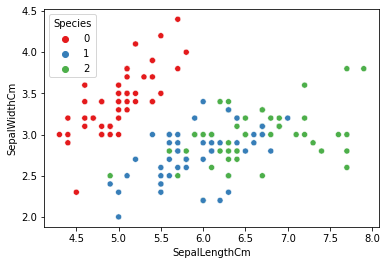

In [ ]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data, palette = 'Set1')

**Observations:**

From the above plot, we can infer that – 

* Species Setosa has smaller sepal lengths but larger sepal widths.
* Versicolor Species lies in the middle of the other two species in terms of sepal length and width
* Species Virginica has larger sepal lengths but smaller sepal widths.


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

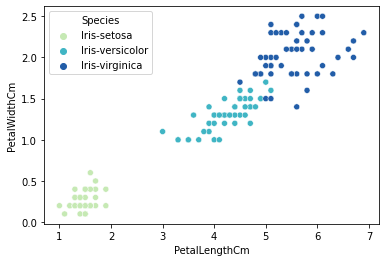

In [ ]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data, palette = 'YlGnBu' )

**Observations:**
From the above plot, we can infer that – 

* Species Setosa has smaller petal lengths and widths.
* Versicolor Species lies in the middle of the other two species in terms of petal length and width
* Species Virginica has the largest of petal lengths and widths.


### Plotting the pairplot

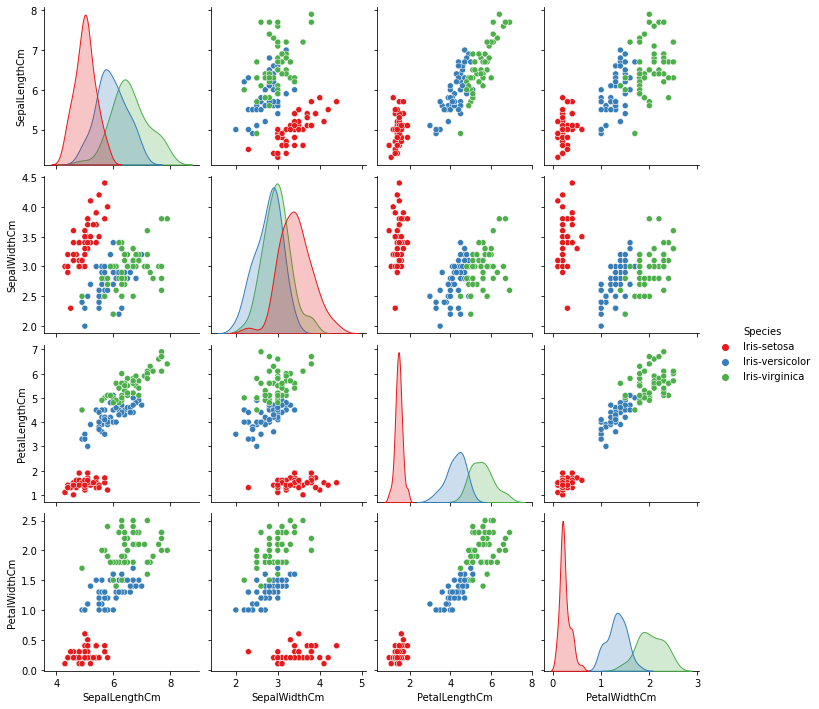

In [ ]:
sns.pairplot(data, hue = 'Species', palette = 'Set1')

### Plotting the boxplots

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

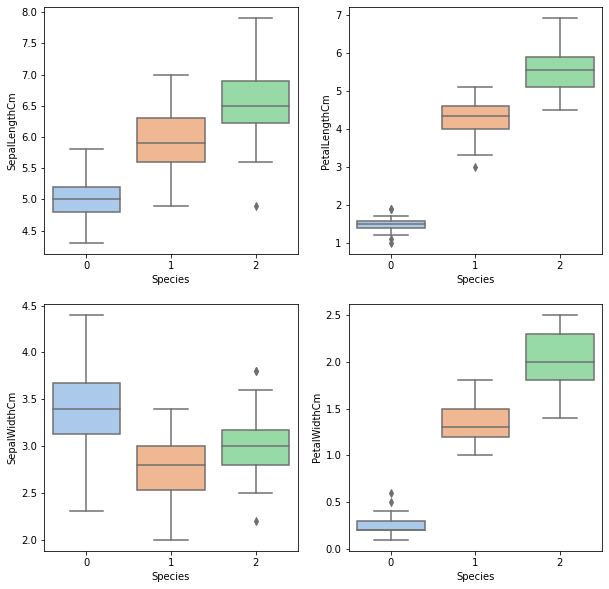

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'SepalLengthCm', x = 'Species', data = data, palette = 'pastel')

plt.subplot(2,2,2)
# Checking for the outliers
sns.boxplot(y = 'PetalLengthCm', x = 'Species', data = data, palette = 'pastel')

plt.subplot(2,2,3)
sns.boxplot(y = 'SepalWidthCm', x = 'Species', data = data, palette = 'pastel')


plt.subplot(2,2,4)
sns.boxplot(y = 'PetalWidthCm', x = 'Species', data = data, palette = 'pastel')

**Observations:**

* Species Setosa has the smallest features and less distributed with some outliers.
* Species Versicolor has the average features.
* Species Virginica has the highest features


In [ ]:
data = data.sample(frac = 1)

In [ ]:
data

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
100            6.3           3.3            6.0           2.5   Iris-virginica
38             4.4           3.0            1.3           0.2      Iris-setosa
73             6.1           2.8            4.7           1.2  Iris-versicolor
115            6.4           3.2            5.3           2.3   Iris-virginica
37             4.9           3.1            1.5           0.1      Iris-setosa
..             ...           ...            ...           ...              ...
60             5.0           2.0            3.5           1.0  Iris-versicolor
144            6.7           3.3            5.7           2.5   Iris-virginica
22             4.6           3.6            1.0           0.2      Iris-setosa
26             5.0           3.4            1.6           0.4      Iris-setosa
27             5.2           3.5            1.5           0.2      Iris-setosa

[150 rows x 5 columns]

# Label Encoding

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [ ]:
data

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
100            6.3           3.3            6.0           2.5        2
38             4.4           3.0            1.3           0.2        0
73             6.1           2.8            4.7           1.2        1
115            6.4           3.2            5.3           2.3        2
37             4.9           3.1            1.5           0.1        0
..             ...           ...            ...           ...      ...
60             5.0           2.0            3.5           1.0        1
144            6.7           3.3            5.7           2.5        2
22             4.6           3.6            1.0           0.2        0
26             5.0           3.4            1.6           0.4        0
27             5.2           3.5            1.5           0.2        0

[150 rows x 5 columns]

# Splitting the dataset

In [ ]:
X = data.drop(['Species'], axis = 1)
Y = data.Species

In [ ]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
100            6.3           3.3            6.0           2.5
38             4.4           3.0            1.3           0.2
73             6.1           2.8            4.7           1.2
115            6.4           3.2            5.3           2.3
37             4.9           3.1            1.5           0.1
..             ...           ...            ...           ...
60             5.0           2.0            3.5           1.0
144            6.7           3.3            5.7           2.5
22             4.6           3.6            1.0           0.2
26             5.0           3.4            1.6           0.4
27             5.2           3.5            1.5           0.2

[150 rows x 4 columns]


In [ ]:
print(Y)

100    2
38     0
73     1
115    2
37     0
      ..
60     1
144    2
22     0
26     0
27     0
Name: Species, Length: 150, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, test_size = 0.25, random_state = 10)

In [ ]:
X_train.shape

(112, 4)

In [ ]:
X_test.shape

(38, 4)

# Model Building and Evaluation
### Building the Decision Tree Model

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
Y_pred = DTC.predict(X_test)

### Evaluating the model

In [ ]:
print(accuracy_score(Y_test, Y_pred)*100)

97.36842105263158


### Printing the classification report

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### Plotting the confusion matrix

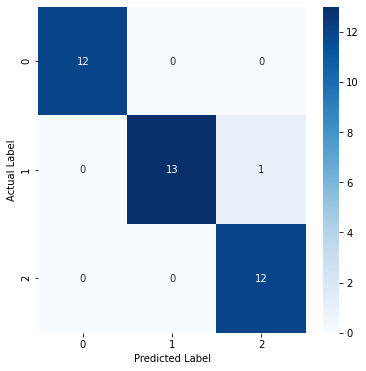

In [ ]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### Making predictions on a random sample

In [ ]:
sample = np.array([[7.3,2.8,6.3, 1.8]]) #Prediction should be Iris-Verginica
print("The prediction is : ", int(DTC.predict(sample)))

The prediction is :  2


/Users/saumyagupta/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Visualizing the decision tree

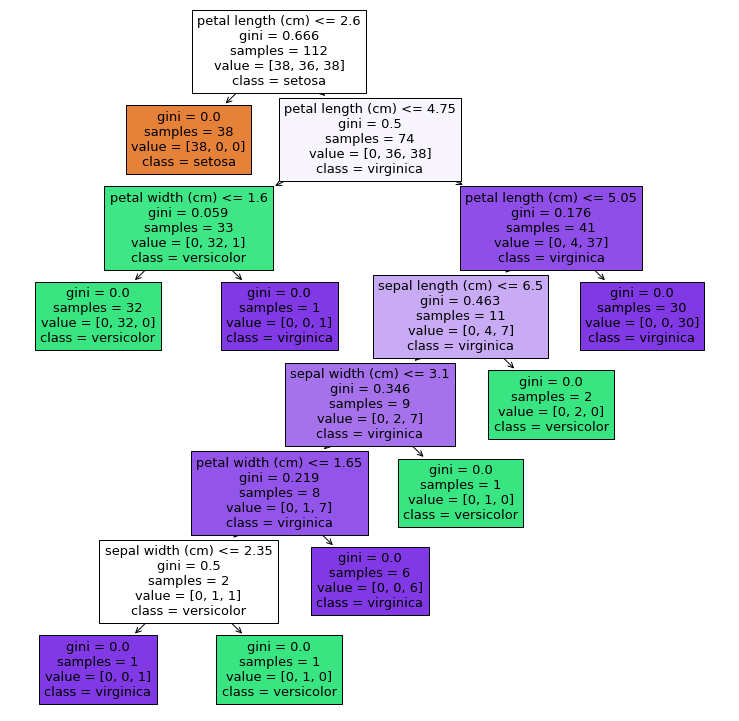

In [ ]:
features =['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize = (13,13))
tree.plot_tree(DTC, feature_names = features, class_names = species, filled = True);

## Thank you!